In [ ]:
# https://archive.ics.uci.edu/dataset/45/heart+disease - I used this website cite
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# import the function to fetch dataset from the UCI Machine Learning Repositary
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Extract the input features (X) and target label (y) as pandas DataFrames
print(heart_disease.metadata)

# General Information about this dataset
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
import pandas as pd
import numpy as np

In [3]:
# Download the Heart Dieases with Cleveland id = 45
heart = fetch_ucirepo(id=45)

# Combine the features and target columns into a single DataFrame df
df = pd.concat([heart.data.features, heart.data.targets], axis = 1)

# Print out first 5 rows in the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
# This code was printed to find duplicates in each row in the dataset
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Shape: (303 patients, 13 features + 1 target) n + 1

Shape: (303, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal

In [5]:
# Fixing Duplicates

# This code was to check all unique values 'ca' and 'thal' column to identify
# any invalid entries
print("Unique values in ca:", df['ca'].unique())
print("Unique values in thal", df['thal'].unique())

# Keep only rows where 'ca' has valid values (0 to 3)
valid_ca_values = [0, 1, 2, 3]
df = df[df['ca'].isin(valid_ca_values)]

# Keep only rows where 'thal' has valid values (1 to 3)
valid_thal_values = [1, 2, 3]
df = df[df['thal'].isin(valid_thal_values)]

# Counting number of rows with duplicates exist before removing it
print("Duplicates rows before dropping:", df.duplicated().sum())

# remove the duplicates
df = df.drop_duplicates()

print("Duplicates rows after the dropping:", df.duplicated().sum())
# So according to this code we did not find any duplicates in the dataset

Unique values in ca: [ 0.  3.  2.  1. nan]
Unique values in thal [ 6.  3.  7. nan]
Duplicates rows before dropping: 0
Duplicates rows after the dropping: 0


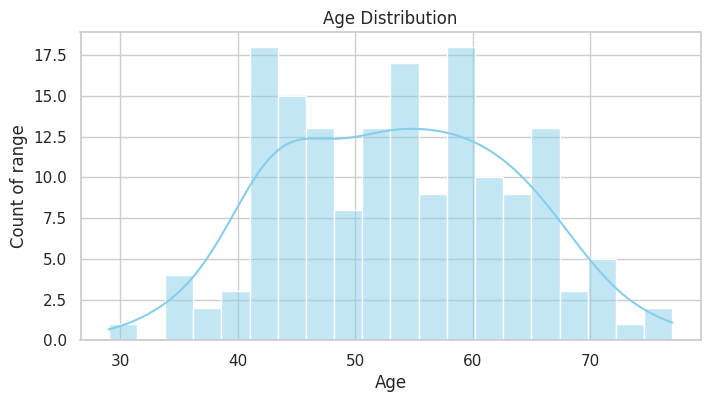

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#1. Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['age'], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count of range")
plt.show()
# To determine the age group vs number of people in dataset at that specific age group

In [9]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

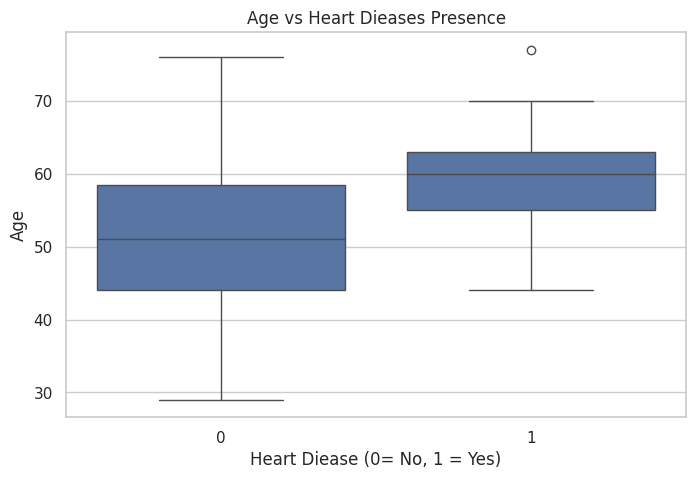

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='num', y='age')
plt.title("Age vs Heart Dieases Presence")
plt.xlabel("Heart Diease (0= No, 1 = Yes)")
plt.ylabel("Age")
plt.show()
# This is boxplot that shows range from Q1 to Q4 where the median of people
# having diease 1 = at age 60 and people who not have diease 0 = around 50.

/tmp/ipython-input-11-459794260.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x = 'num', y = 'thalach', palette='muted')


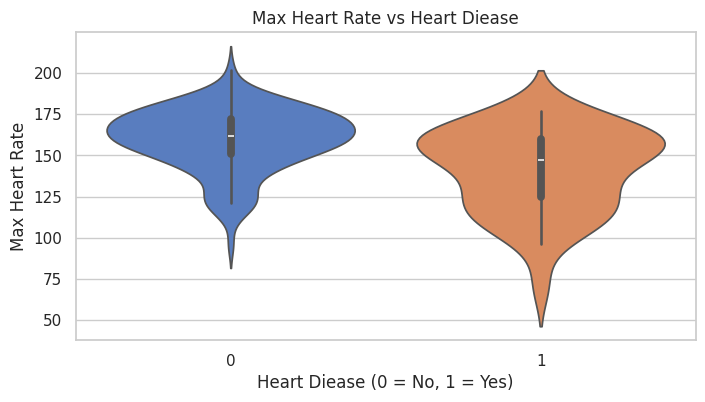

In [11]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x = 'num', y = 'thalach', palette='muted')
plt.title("Max Heart Rate vs Heart Diease")
plt.xlabel("Heart Diease (0 = No, 1 = Yes)")
plt.ylabel("Max Heart Rate")
plt.show()

# The width of each “violin” at a heart rate value shows how many patients had that value (wider = more common).
# The white dot marks the median max heart rate in each group.
# The thick center bar shows the interquartile range (middle 50% of data).
# The overall shape reveals the distribution’s spread and skewness.

In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Convert target 'num' to binary: 0 = no heart disease, 1 = heart disease
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Features and target
X = df.drop(columns=['num'])
y = df['num']

# Split dataset with stratify to keep class balance in train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42, test_size=0.2
)

print("Before Oversampling:")
print(y_train.value_counts())

# Use RandomOverSampler to balance minority class in training data
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("\nAfter Oversampling:")
print(y_train_res.value_counts())

# Train Random Forest on balanced data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# Predict on test set
y_pred = clf.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Before Oversampling:
num
0    101
1     30
Name: count, dtype: int64

After Oversampling:
num
0    101
1    101
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       1.00      0.43      0.60         7

    accuracy                           0.88        33
   macro avg       0.93      0.71      0.76        33
weighted avg       0.89      0.88      0.86        33



In [13]:
!pip install streamlit

In [14]:
import pickle

# Save model to file
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(clf, file)


In [15]:
import pandas as pd
import pickle
import streamlit as st

# Load trained model
with open('rf_model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title("Heart Disease Risk Prediction")

st.write("Enter your health data below:")

# Input fields for features — adjust based on your dataset's columns
age = st.number_input("Age", min_value=1, max_value=120, value=50)
sex = st.selectbox("Sex", options=[0,1], format_func=lambda x: "Female" if x==0 else "Male")
cp = st.slider("Chest Pain Type (0-3)", 0, 3, 1)
trestbps = st.number_input("Resting Blood Pressure", min_value=80, max_value=200, value=120)
chol = st.number_input("Cholesterol", min_value=100, max_value=600, value=200)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl?", options=[0,1])
restecg = st.selectbox("Resting ECG Results (0-2)", options=[0,1,2])
thalach = st.number_input("Max Heart Rate Achieved", min_value=60, max_value=220, value=150)
exang = st.selectbox("Exercise Induced Angina?", options=[0,1])
oldpeak = st.number_input("ST Depression", min_value=0.0, max_value=10.0, value=1.0, step=0.1)
slope = st.selectbox("Slope of ST Segment (0-2)", options=[0,1,2])
ca = st.selectbox("Number of Major Vessels Colored (0-3)", options=[0,1,2,3])
thal = st.selectbox("Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)", options=[1,2,3])

# When button clicked, make prediction
if st.button("Predict Risk"):
    # Prepare feature vector as dataframe
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'cp': [cp],
        'trestbps': [trestbps],
        'chol': [chol],
        'fbs': [fbs],
        'restecg': [restecg],
        'thalach': [thalach],
        'exang': [exang],
        'oldpeak': [oldpeak],
        'slope': [slope],
        'ca': [ca],
        'thal': [thal]
    })

    # Predict (0 = no disease, 1 = disease)
    prediction = model.predict(input_data)[0]
    proba = model.predict_proba(input_data)[0][prediction]

    if prediction == 1:
        st.error(f"High risk of heart disease (confidence: {proba:.2f})")
    else:
        st.success(f"Low risk of heart disease (confidence: {proba:.2f})")

2025-07-14 14:36:15.411 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 14:36:15.789 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-14 14:36:15.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 14:36:15.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 14:36:15.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 14:36:15.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 14:36:15.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 14:36:15.819 Thread 'MainThread': mi

In [16]:
# 1. Install
!pip install streamlit pyngrok

In [17]:
# 2. Write super simple app.py
%%writefile app.py
import streamlit as st

st.title("Hello from Streamlit in Colab!")
st.write("This is a simple test app.")


Overwriting app.py


In [18]:
# 3. Run streamlit + ngrok tunnel
from pyngrok import ngrok
import os

ngrok.kill()
url = ngrok.connect(8501)
print("Open this URL:", url)

os.system('streamlit run app.py &')

Open this URL: NgrokTunnel: "https://15f147f76aae.ngrok-free.app" -> "http://localhost:8501"


0

In [31]:
print("Hello, Parth!")
!python app.py

Hello, Parth!
2025-07-14 14:22:39.436 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 14:22:39.530 
  command:

    streamlit run app.py [ARGUMENTS]
2025-07-14 14:22:39.530 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 14:22:39.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 14:22:39.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 14:22:39.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-14 14:22:39.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [19]:
%%writefile app.py
import streamlit as st

st.title("Hello from Streamlit!")
st.write("This app runs inside Colab.")

Overwriting app.py


In [20]:
!pip install streamlit pyngrok

from pyngrok import ngrok
import os

from pyngrok import ngrok
ngrok.set_auth_token("2zjdED4rrg3bggDzXHnC7Z38oGj_6dcmyUZTS4FcBcsKkoj1J")

In [21]:
# Write a simple app
%%writefile app.py
import streamlit as st
st.title("Hello from Streamlit!")
st.write("This app runs inside Colab.")

# Run the app and open the tunnel
from pyngrok import ngrok
import os

# Kill old tunnels if any
ngrok.kill()

# Setup tunnel for port 8501
public_url = ngrok.connect(8501)
print("Open your Streamlit app here:", public_url)

# Run Streamlit app in the background
os.system("streamlit run app.py &")

Overwriting app.py


In [22]:
from pyngrok import ngrok
import os

ngrok.kill()
os.system("kill $(pgrep streamlit)")  # kills any existing Streamlit apps

0

In [25]:
public_url = ngrok.connect(8501)
print("Open your Streamlit app here:", public_url)

os.system("streamlit run app.py &")

Open your Streamlit app here: NgrokTunnel: "https://5d4d9c295d03.ngrok-free.app" -> "http://localhost:8501"


0